<center>Copyright by Pierian Data Inc.
For more information, visit us at www.pieriandata.com

## <center>Churn Analysis and Predictive Modeling for an Internet and Telephone Provider

### Part I: Data Checking

<b> Step #1: Import all of the libraries we need in this project </b>

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>Step #2: Read the CSV file as our DataFrame </b>

In [129]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [130]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<b> Step #3: Use .info() and .isnull().sum() check whether we have any null values in the dataset. </b>

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [132]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<i>Based on the output above, we can conclude that our dataset is already cleaned and does not contain any null values</i>

<b>Step #4: Use .describe() to get a quick statistical summary of the numeric columns in the dataset </b>

In [133]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<i>Based on the output above, we can conclude that our dataset contains a significant number of categorical columns. Therefore, it is advisable to convert these categorical variables into dummy variables</i>

### Part II:  Exploratory Data Analysis

<b>Step #5: Use sns.countplot() to display the balance of the class labels (Churn) </b>

<AxesSubplot:xlabel='Churn', ylabel='count'>

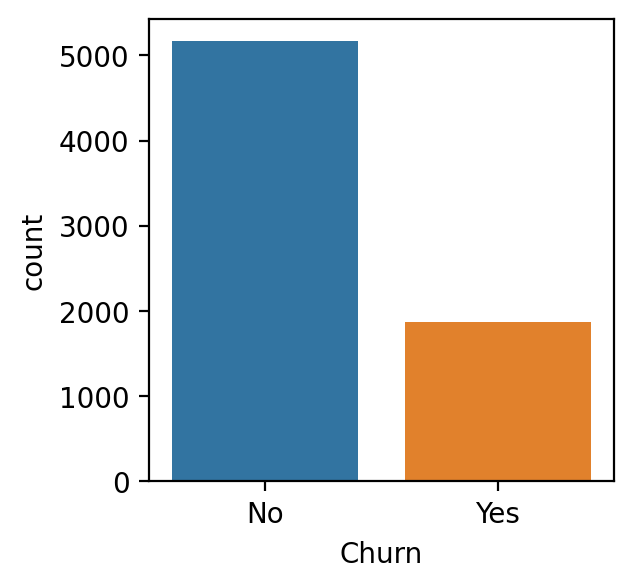

In [134]:
plt.figure(figsize = (3, 3), dpi = 200)
sns.countplot(x = 'Churn', data = df)

<b>Step #6: Use sns.violinplot() to explore the distribution of TotalCharges between Churn categories </b>

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

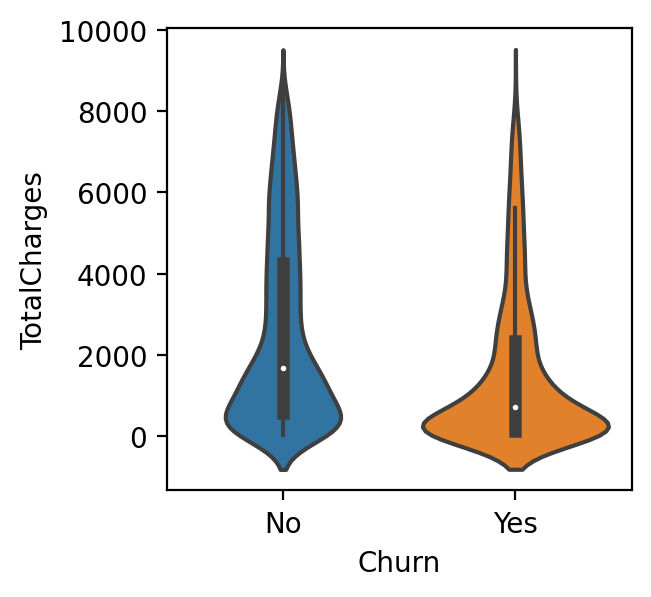

In [135]:
plt.figure(figsize = (3, 3), dpi = 200)
sns.violinplot(x = 'Churn', y = 'TotalCharges', data = df)

<b>Step #7: Use sns.boxplot() to show the the distribution of TotalCharges per Contract type </b>

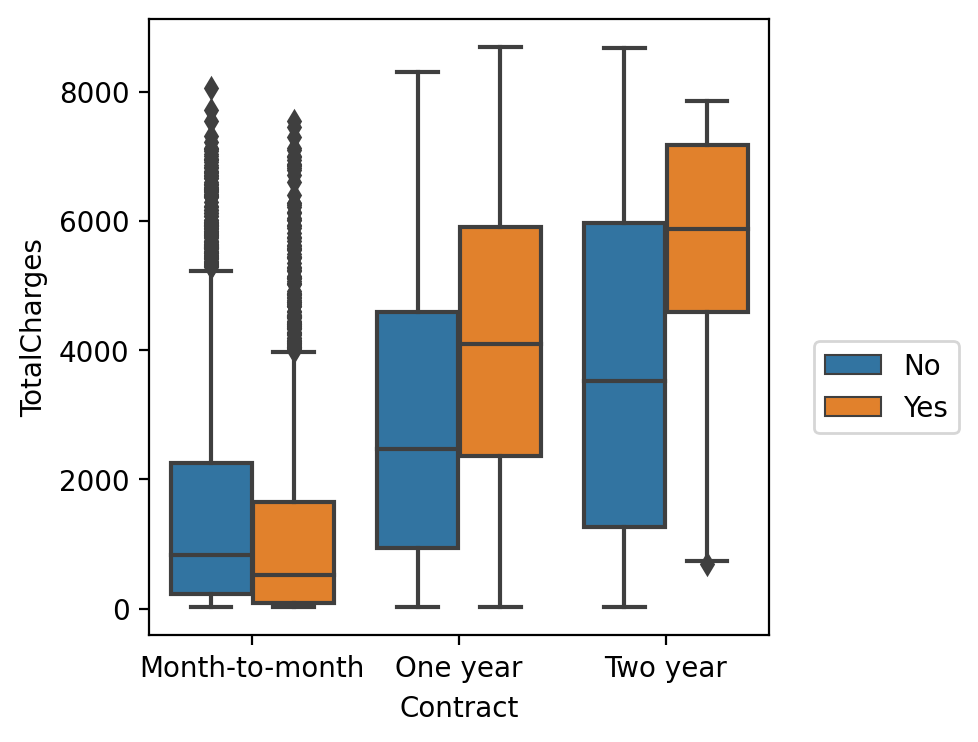

In [136]:
#CODE HERE
plt.figure(figsize = (4, 4), dpi = 200)
sns.boxplot(x = 'Contract', y = 'TotalCharges', 
            hue = 'Churn', data = df)
plt.legend(bbox_to_anchor = (1.05,0.5))

<b>Step #8: Use pd.get_dummies() to convert categorical features into dummy variables. Use sns.barplot() to show the correlation of the following features to the class label
<br><br>
List of Features: <br>
['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']<br></b>

In [137]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

df2 = pd.get_dummies(df, columns = categorical_columns)
df2

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,No,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,24,84.80,1990.50,No,0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
7028,2234-XADUH,72,103.20,7362.90,No,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
7029,4801-JZAZL,11,29.60,346.45,No,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
7030,8361-LTMKD,4,74.40,306.60,Yes,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [138]:
df2['Churn_Yes'] = df2['Churn'].map({'No': 0, 'Yes': 1})
df2.corr(numeric_only = True)['Churn_Yes'].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
DeviceProtection_No internet service      -0.227578
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
SeniorCitizen_0                           -0.150541
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMetho

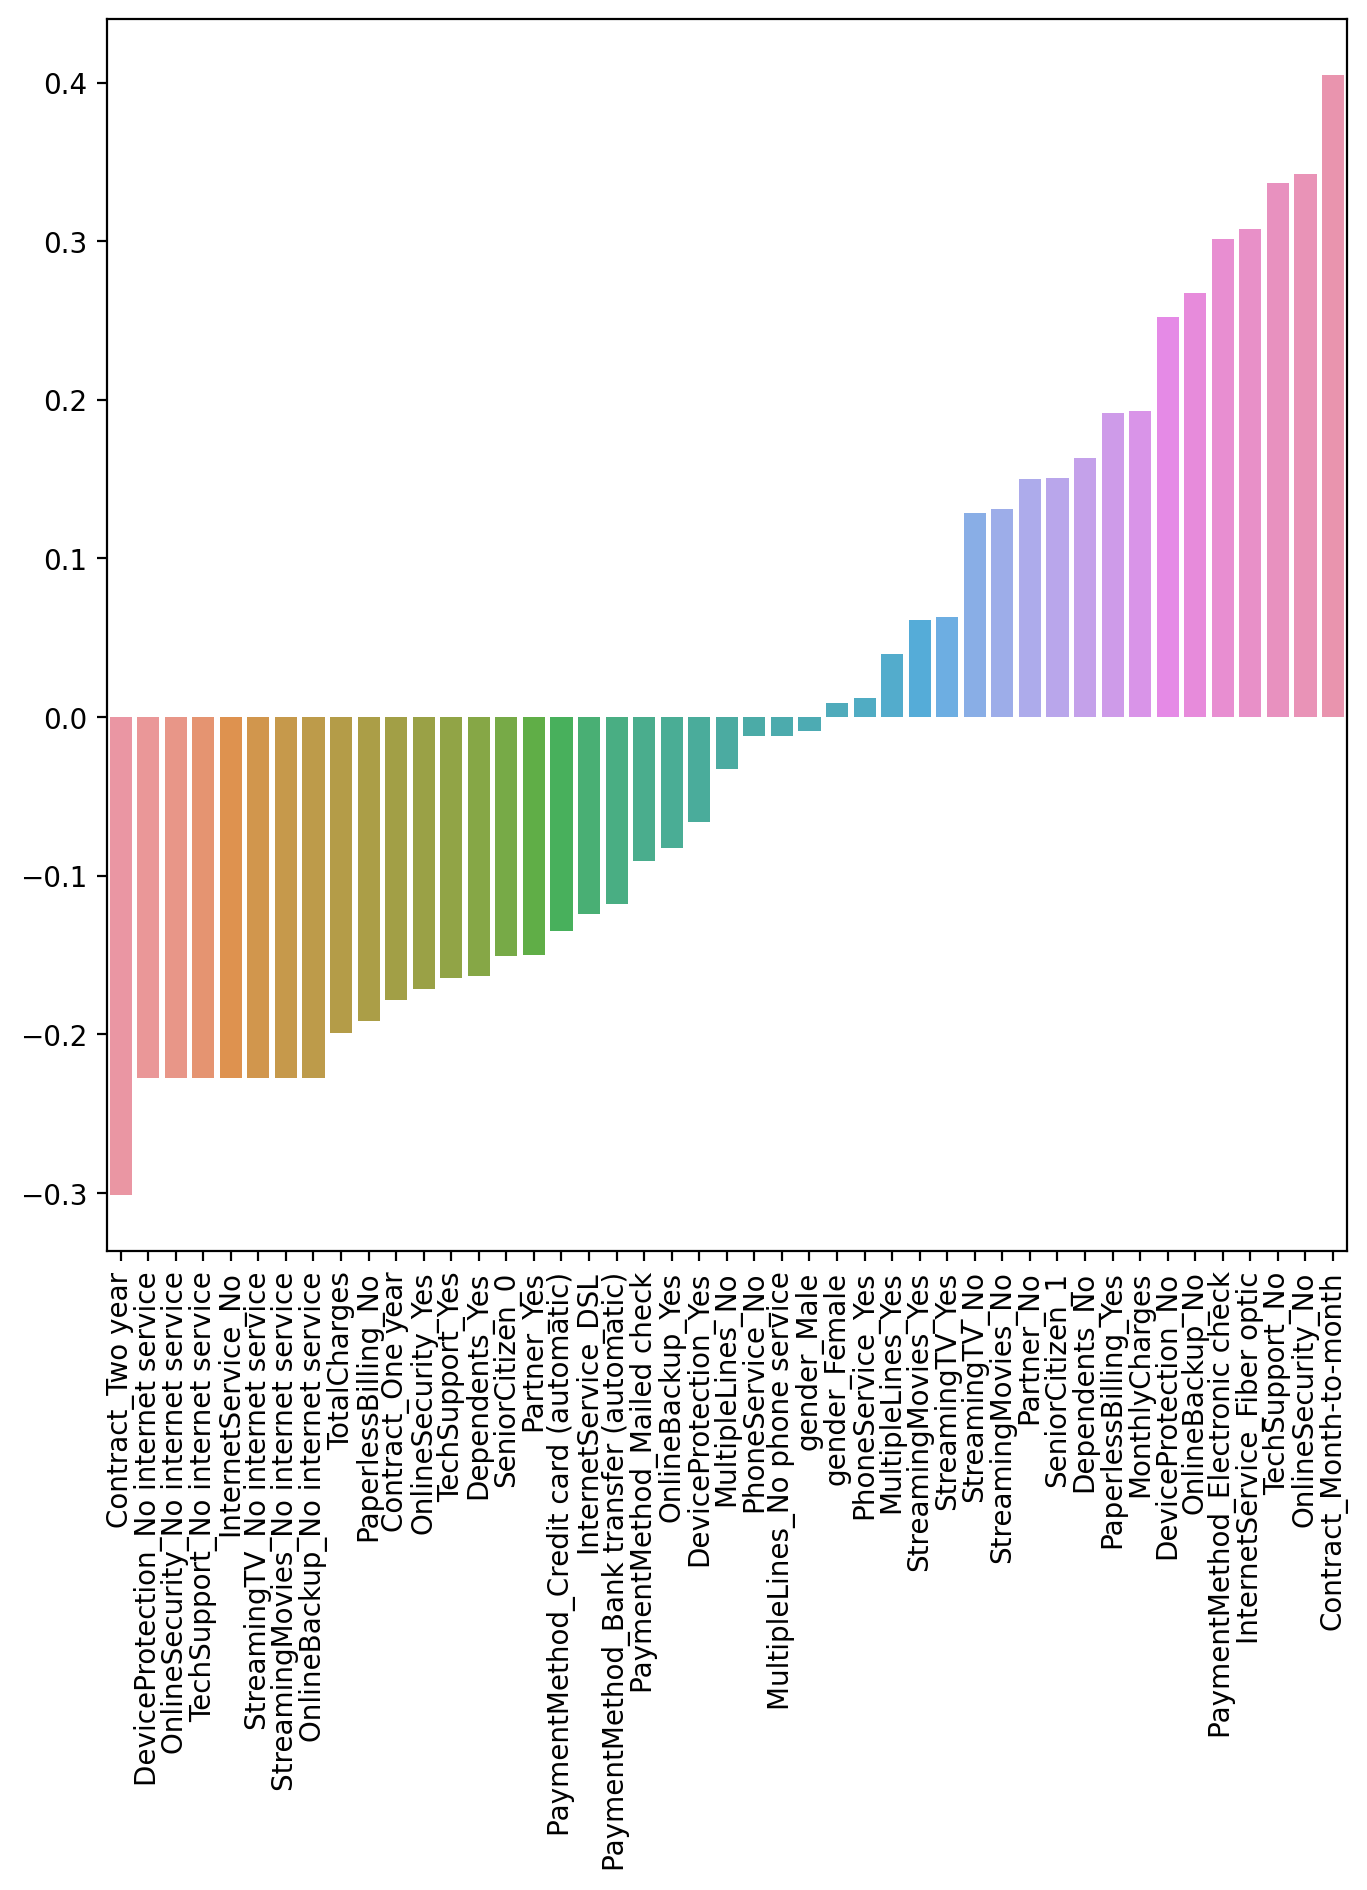

In [139]:
churn_corr = df2.corr(numeric_only = True)['Churn_Yes']
churn_corr = churn_corr.drop(['tenure', 'Churn_Yes'])
corrs = pd.Series(index = churn_corr.index, data = churn_corr.values)
corrs = corrs.sort_values()

plt.figure(figsize = (8, 8), dpi = 200)
sns.barplot(x = corrs.index, y = corrs.values)
plt.xticks(rotation = 90);

### Part III: Churn Analysis

<b>Step #9: Find the 3 contract types available using .unique()</b>

In [140]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<b>Step #10: Use sns.histplot() to create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer</b>

<AxesSubplot:xlabel='tenure', ylabel='Count'>

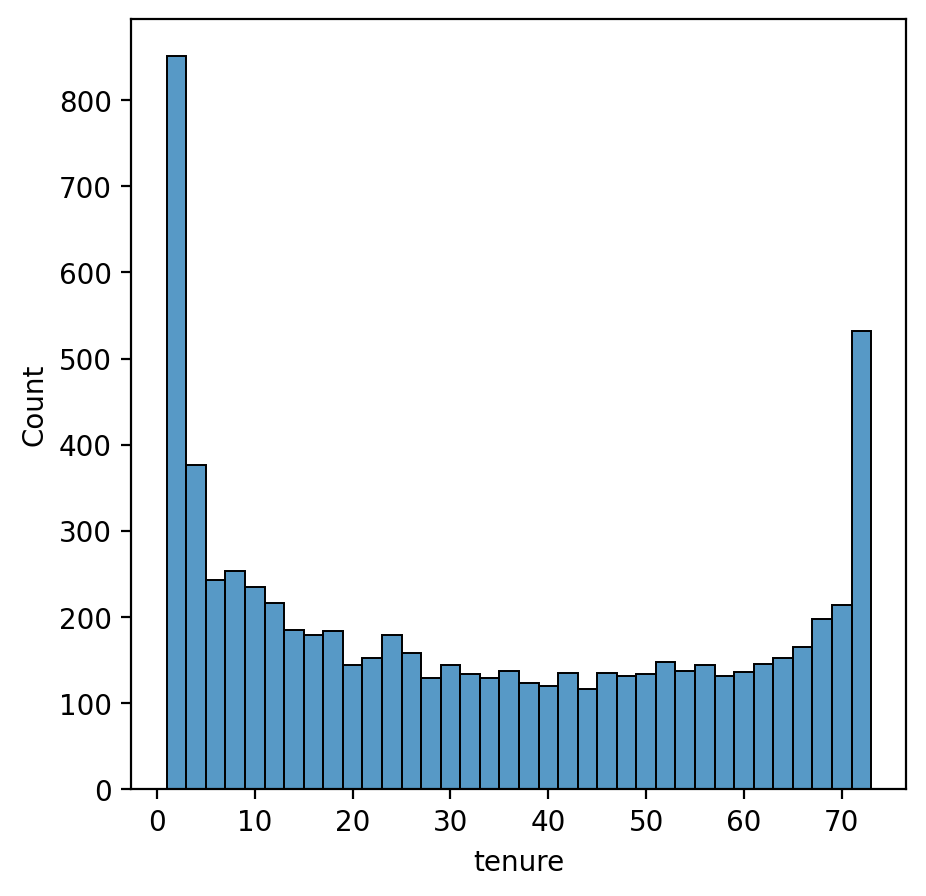

In [141]:
plt.figure(figsize = (5, 5), dpi = 200)
sns.histplot(data=df, x="tenure", binwidth=2)

<b>Step #11: Use sns.FacetGrid() to create histograms separated by two additional features, Churn and Contract</b>

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will

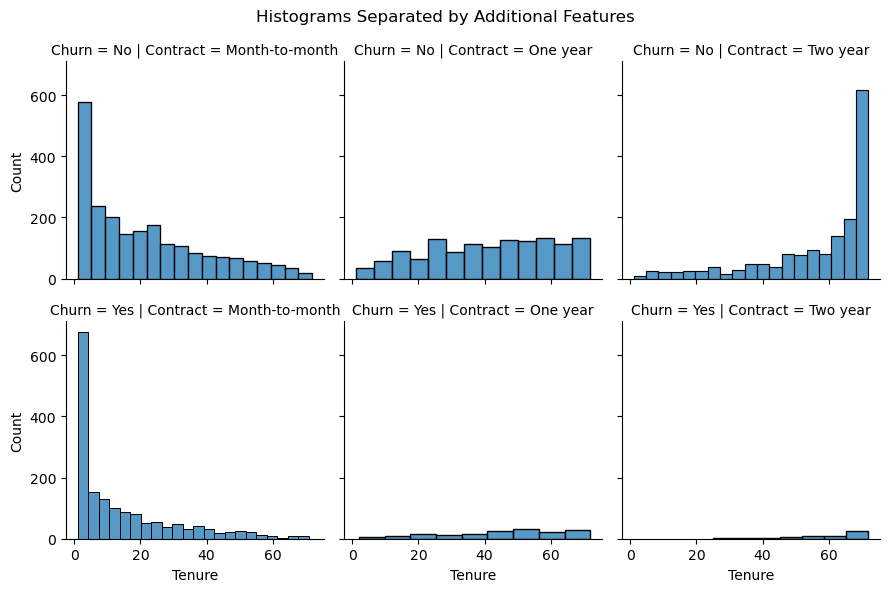

In [142]:
g = sns.FacetGrid(df, row="Churn", col="Contract")
g.map(sns.histplot, "tenure")
g.set_axis_labels("Tenure", "Count")
g.fig.suptitle("Histograms Separated by Additional Features")
plt.tight_layout()

<b>Step #12: Use sns.scatterplot() to display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn </b>

In [143]:
#CODE HERE
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

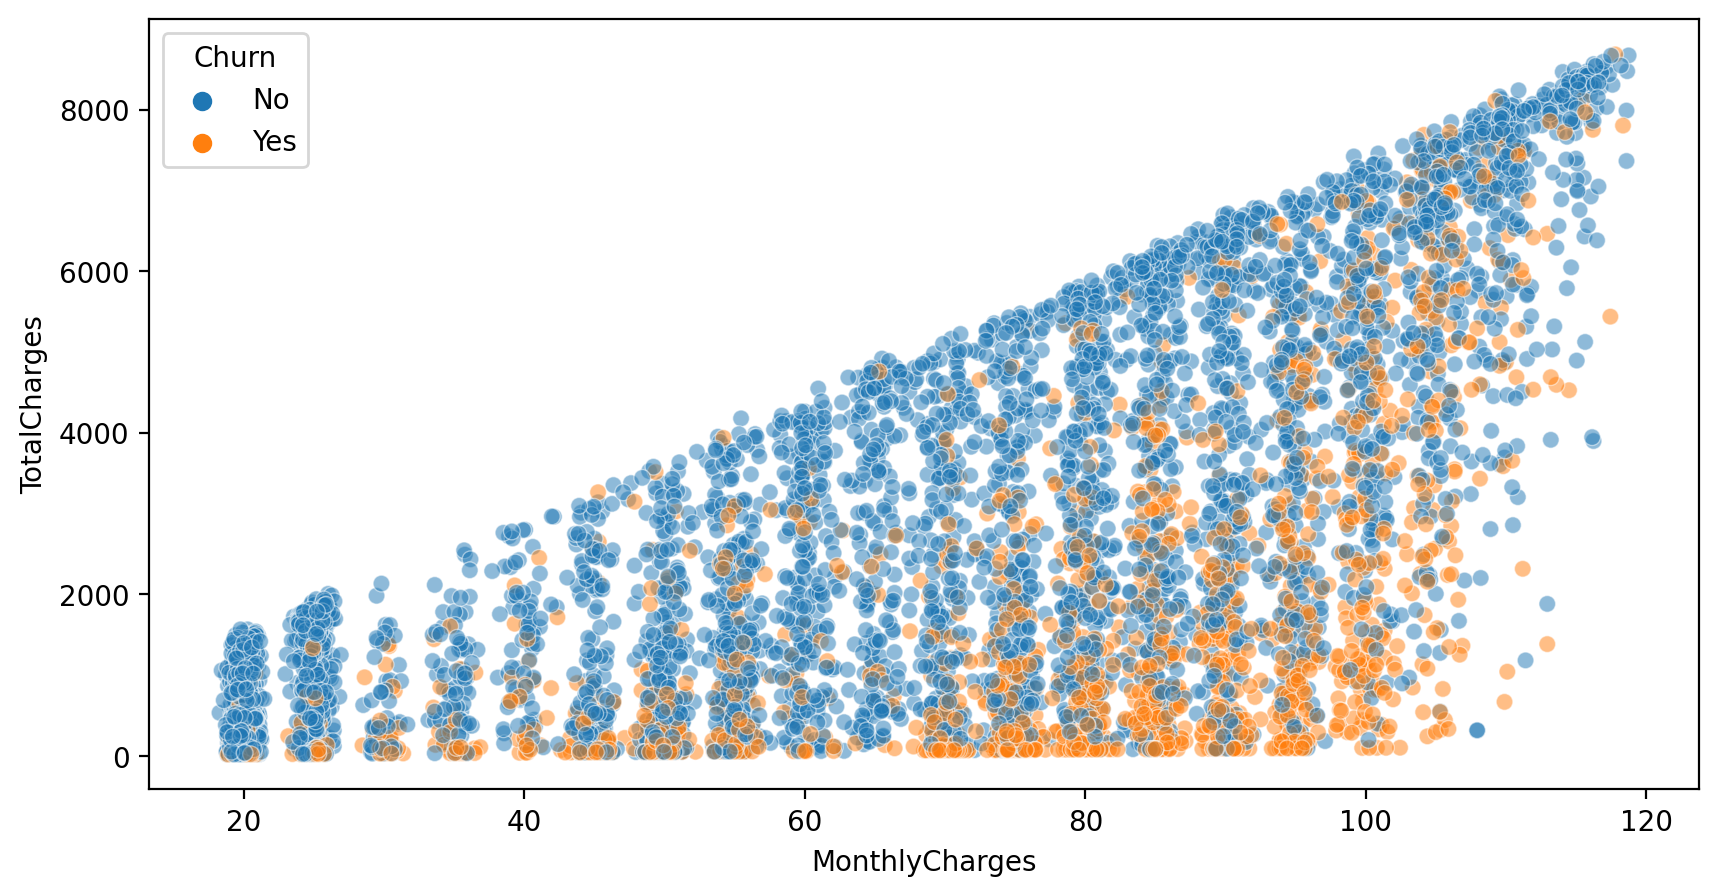

In [144]:
plt.figure(figsize = (10, 5), dpi = 200)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn", alpha = 0.5)

<b>Step #13: Use .groupby() and others to calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%.</b>

In [145]:
churned_df = df[df['Churn'] == 'Yes']
total_count = df.groupby('tenure').size()
churned_count = churned_df.groupby('tenure').size()
percentage = (churned_count / total_count) * 100
new_df = pd.DataFrame({'Tenure': total_count.index, 'Churn Rate': percentage})
new_df = new_df.set_index('Tenure')

In [146]:
new_df

,Churn Rate
Tenure,
1,61.990212
2,51.680672
3,47.000000
4,47.159091
5,48.120301
...,...
68,9.000000
69,8.421053
70,9.243697


<b>Step #14: Use sns.lineplot() to create a plot showing churn rate per months of tenure</b>

<AxesSubplot:xlabel='Tenure', ylabel='Churn Rate'>

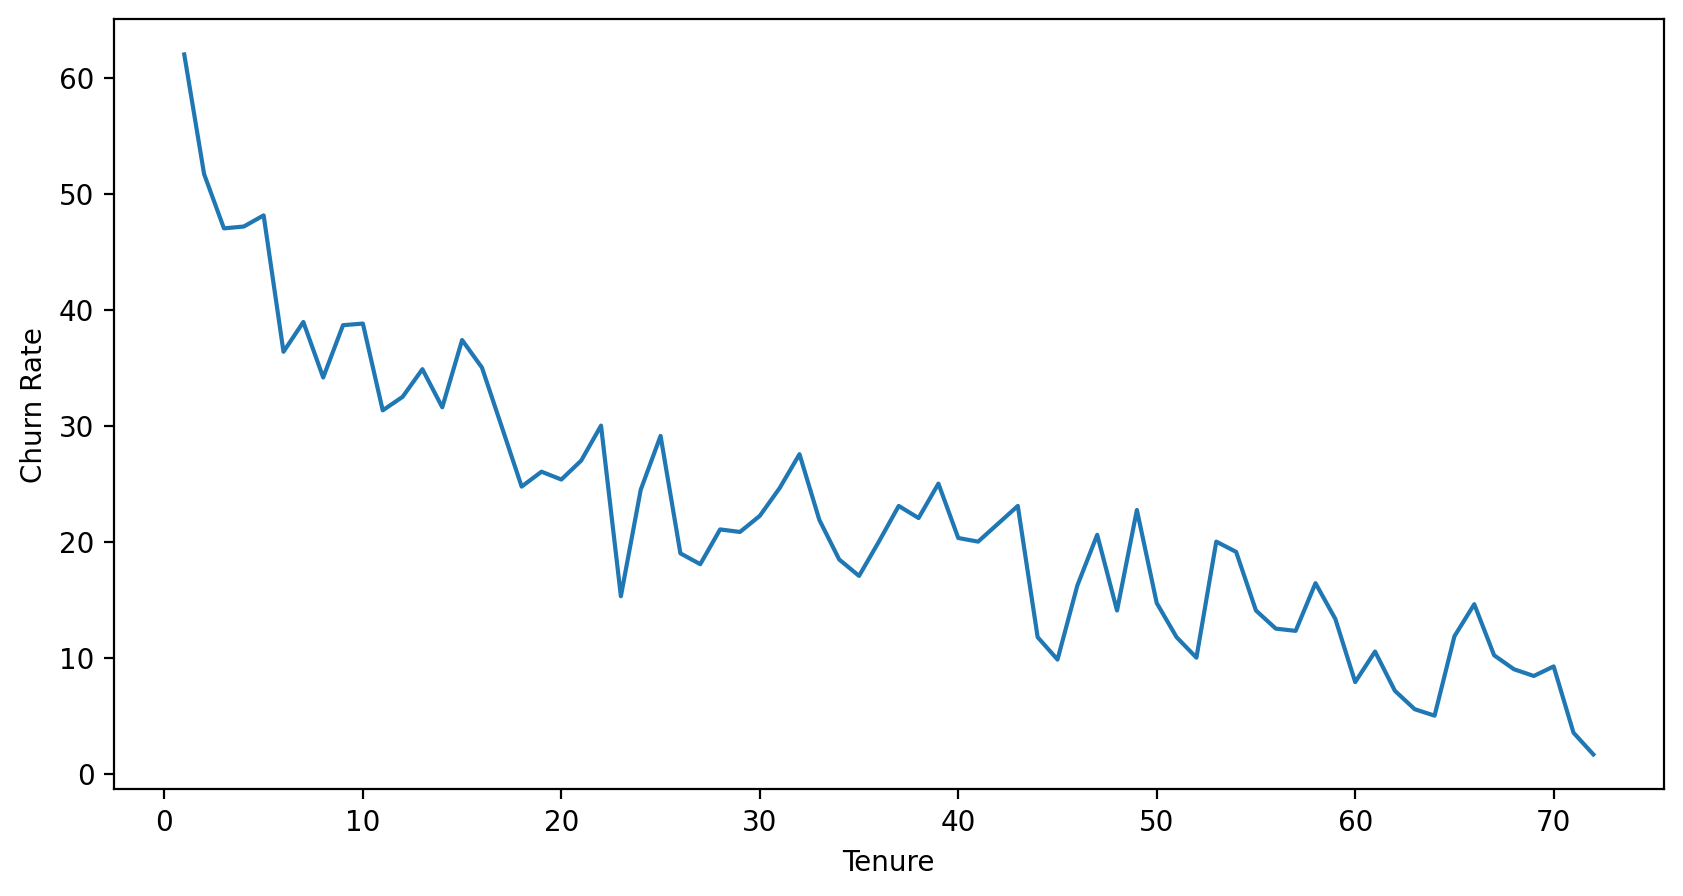

In [147]:
plt.figure(figsize = (10, 5), dpi = 200)
sns.lineplot(data=new_df, x="Tenure", y="Churn Rate")

<b>Step #15: Use pd.cut() to create a new column called Tenure Cohort that creates 4 separate categories:<br><br>
0-12 Months'<br>
'12-24 Months'<br>
'24-48 Months'<br>
'Over 48 Months'<br></b>

In [148]:
bins = [0, 12, 24, 48, 73]
labels = ['0-12 Months', '12-24 Months', '24-48 Months', 'Over 48 Months']
df['tenure_cohort'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
df[['tenure', 'tenure_cohort']]

,tenure,tenure_cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,24-48 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

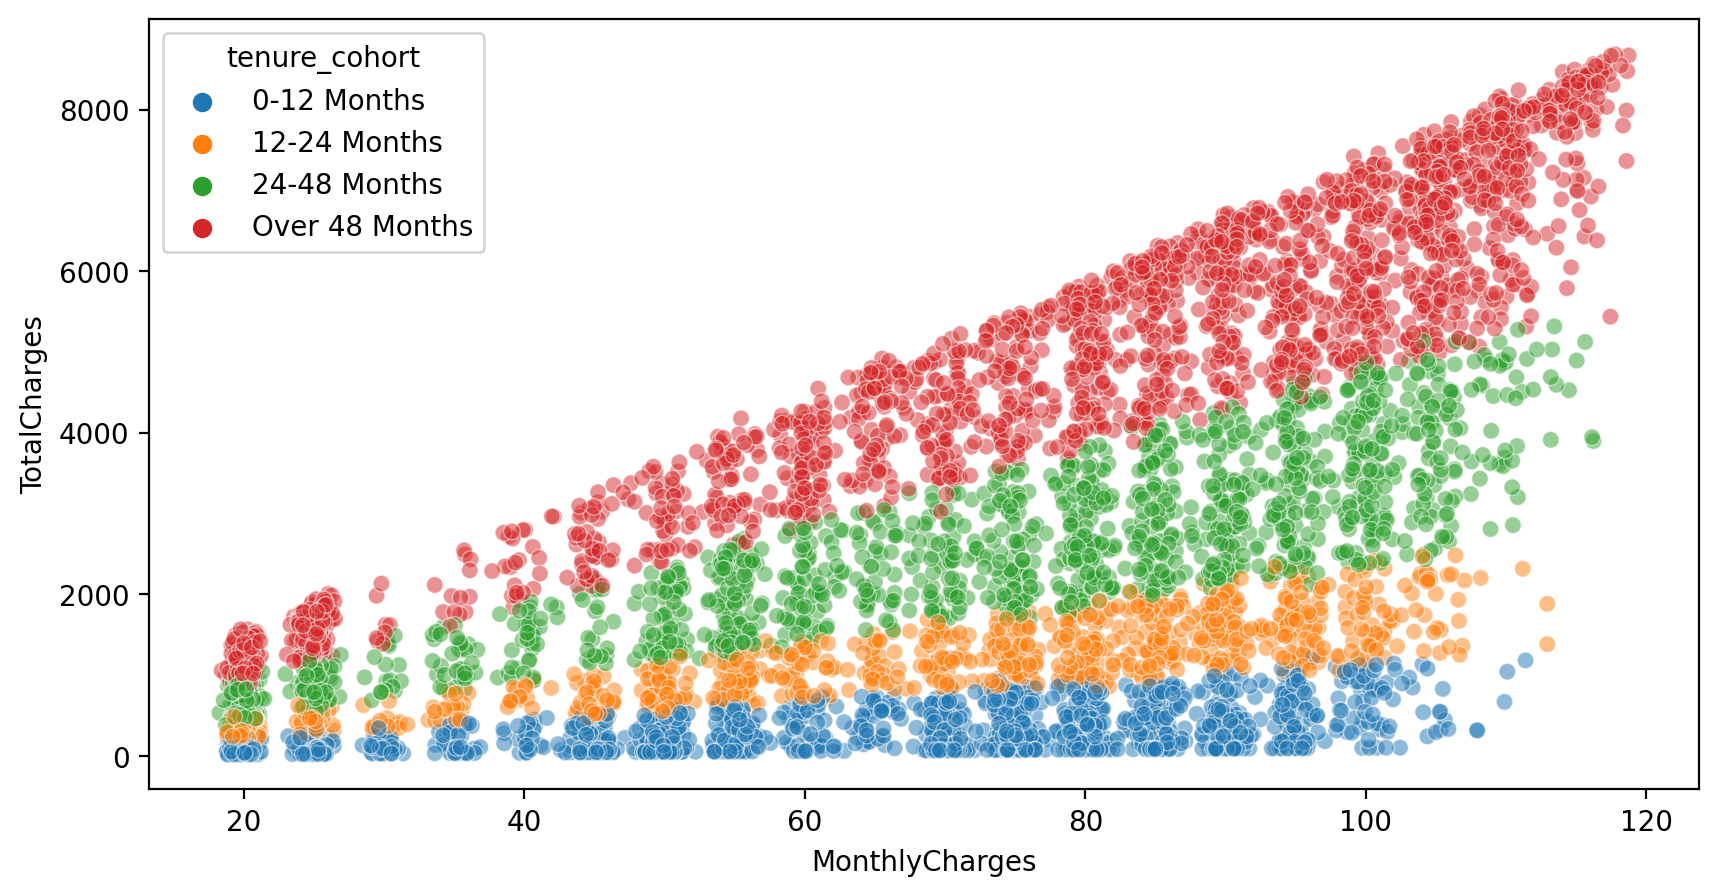

In [149]:
plt.figure(figsize = (10, 5), dpi = 200)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="tenure_cohort", alpha = 0.5)

<b>Step #16: Use sns.countplot() to show the churn count per cohort</b>

<AxesSubplot:xlabel='tenure_cohort', ylabel='count'>

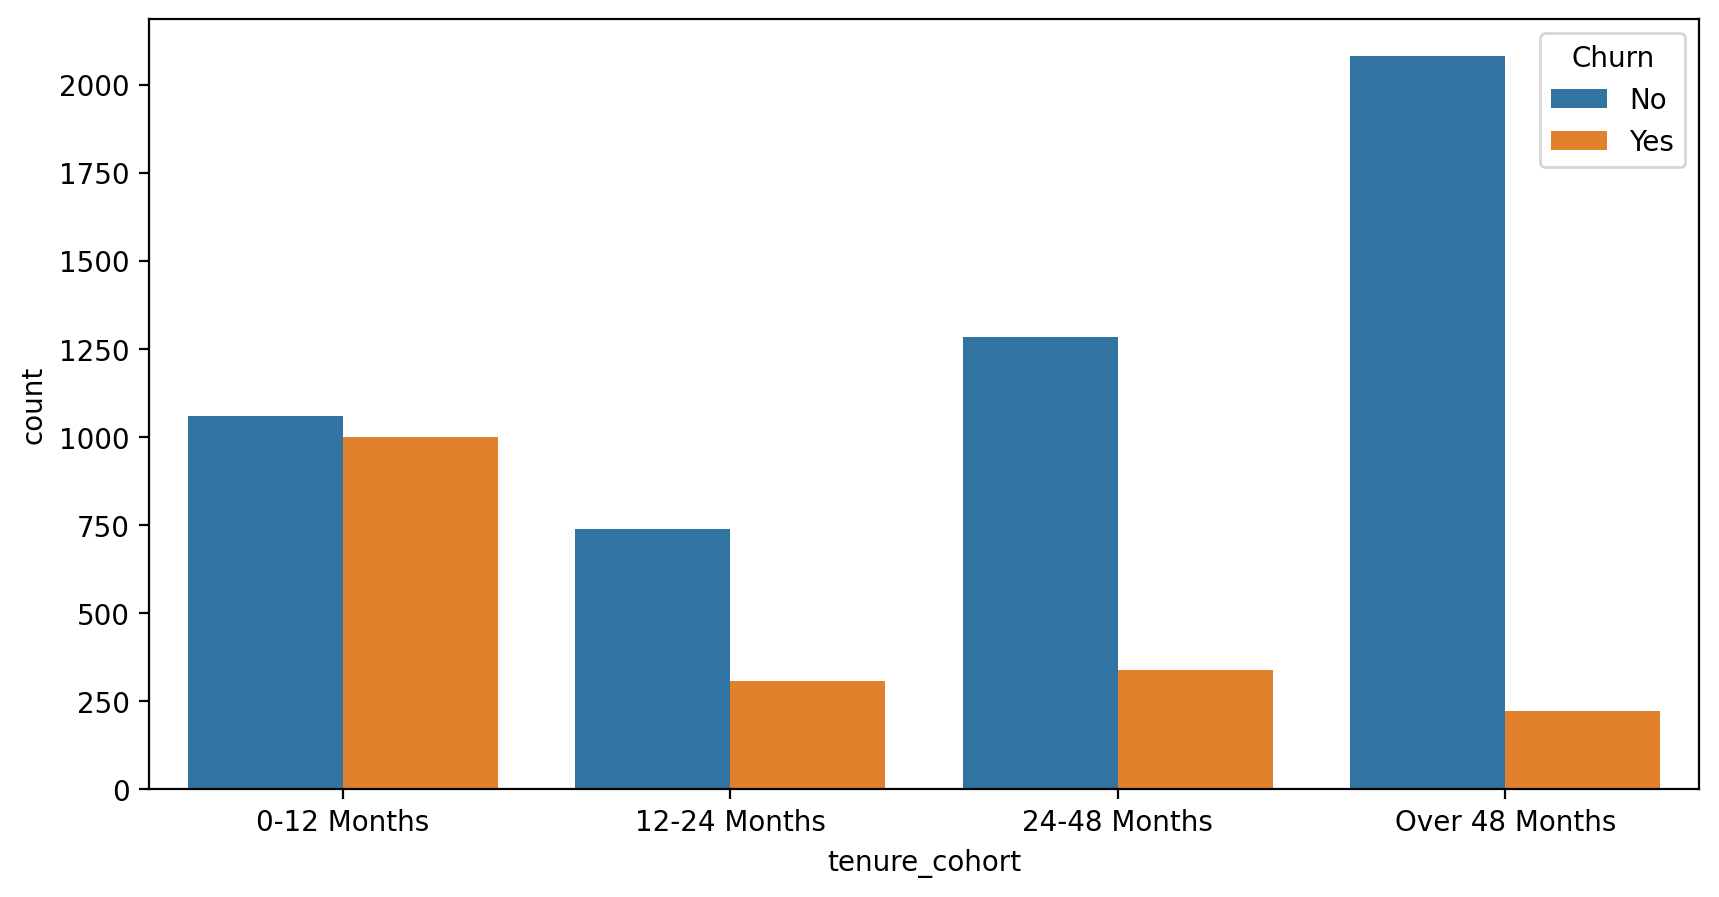

In [150]:
plt.figure(figsize = (10, 5), dpi = 200)
sns.countplot(data=df, x="tenure_cohort", hue="Churn")

<b>Step #17: Use sns.catplot() to create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue</b>

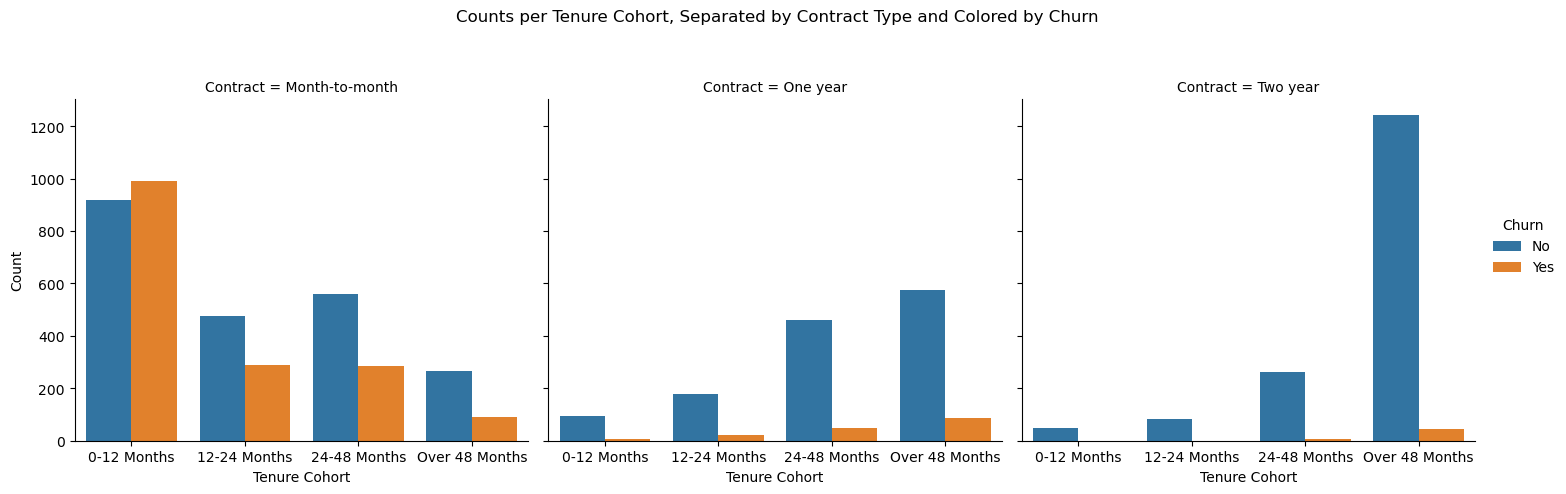

In [151]:
g = sns.catplot(data=df, x='tenure_cohort', col='Contract', hue='Churn', kind='count')

g.set_axis_labels('Tenure Cohort', 'Count')

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Counts per Tenure Cohort, Separated by Contract Type and Colored by Churn');

# Part IV: Predictive Modeling

## Single Decision Tree

<b>Step #18: separate out the data into X features and Y label </b>

In [152]:
X = pd.get_dummies(df.drop(['customerID', 'Churn'], axis = 1), drop_first = True)

In [153]:
y = df['Churn']

<b>Step #19: perform a train test split, holding out 10% of the data for testing </b>

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

<b>Step #20: Decision Tree Perfomance.<br><br>
   Complete the following tasks:<br><br>
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).<br>
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.<br>
   2. Calculate feature importances from the decision tree.<br>
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
max_features = ['auto', 'sqrt', 'log2']

param_grid = {'criterion': criterion,
           'splitter': splitter,
           'max_features': max_features}

In [160]:
model = DecisionTreeClassifier()

In [161]:
grid = GridSearchCV(model, param_grid)

In [162]:
grid.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_faile

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [163]:
grid.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}

In [164]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_features = 'log2',
                             splitter = 'random')

In [165]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_features='log2', splitter='random')

In [166]:
predictions = dtc.predict(X_test)

In [167]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [168]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.85      0.79      0.82       557
         Yes       0.38      0.48      0.42       147

    accuracy                           0.73       704
   macro avg       0.62      0.64      0.62       704
weighted avg       0.75      0.73      0.74       704



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


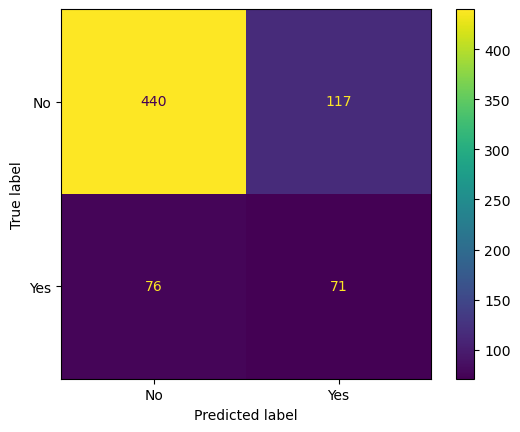

In [169]:
plot_confusion_matrix(dtc, X_test, y_test);

In [170]:
dtc.feature_importances_

array([0.02813511, 0.20736884, 0.11644523, 0.11655444, 0.04079344,
       0.02556587, 0.03054672, 0.00762177, 0.00538384, 0.02183725,
       0.03544695, 0.0541822 , 0.        , 0.03297233, 0.        ,
       0.02574082, 0.        , 0.02321996, 0.        , 0.02729044,
       0.        , 0.0220447 , 0.        , 0.02721766, 0.01440177,
       0.01467144, 0.02815947, 0.02075598, 0.0281915 , 0.01288779,
       0.01228709, 0.01052522, 0.00975218])

In [174]:
imp_feats.sort_values('Importance')

,Importance
MultipleLines_No phone service,0.005384
PhoneService_Yes,0.007622
tenure_cohort_Over 48 Months,0.009752
tenure_cohort_24-48 Months,0.010525
tenure_cohort_12-24 Months,0.012287
PaymentMethod_Mailed check,0.012888
Contract_One year,0.014402
Contract_Two year,0.014671
PaymentMethod_Credit card (automatic),0.020756
MultipleLines_Yes,0.021837


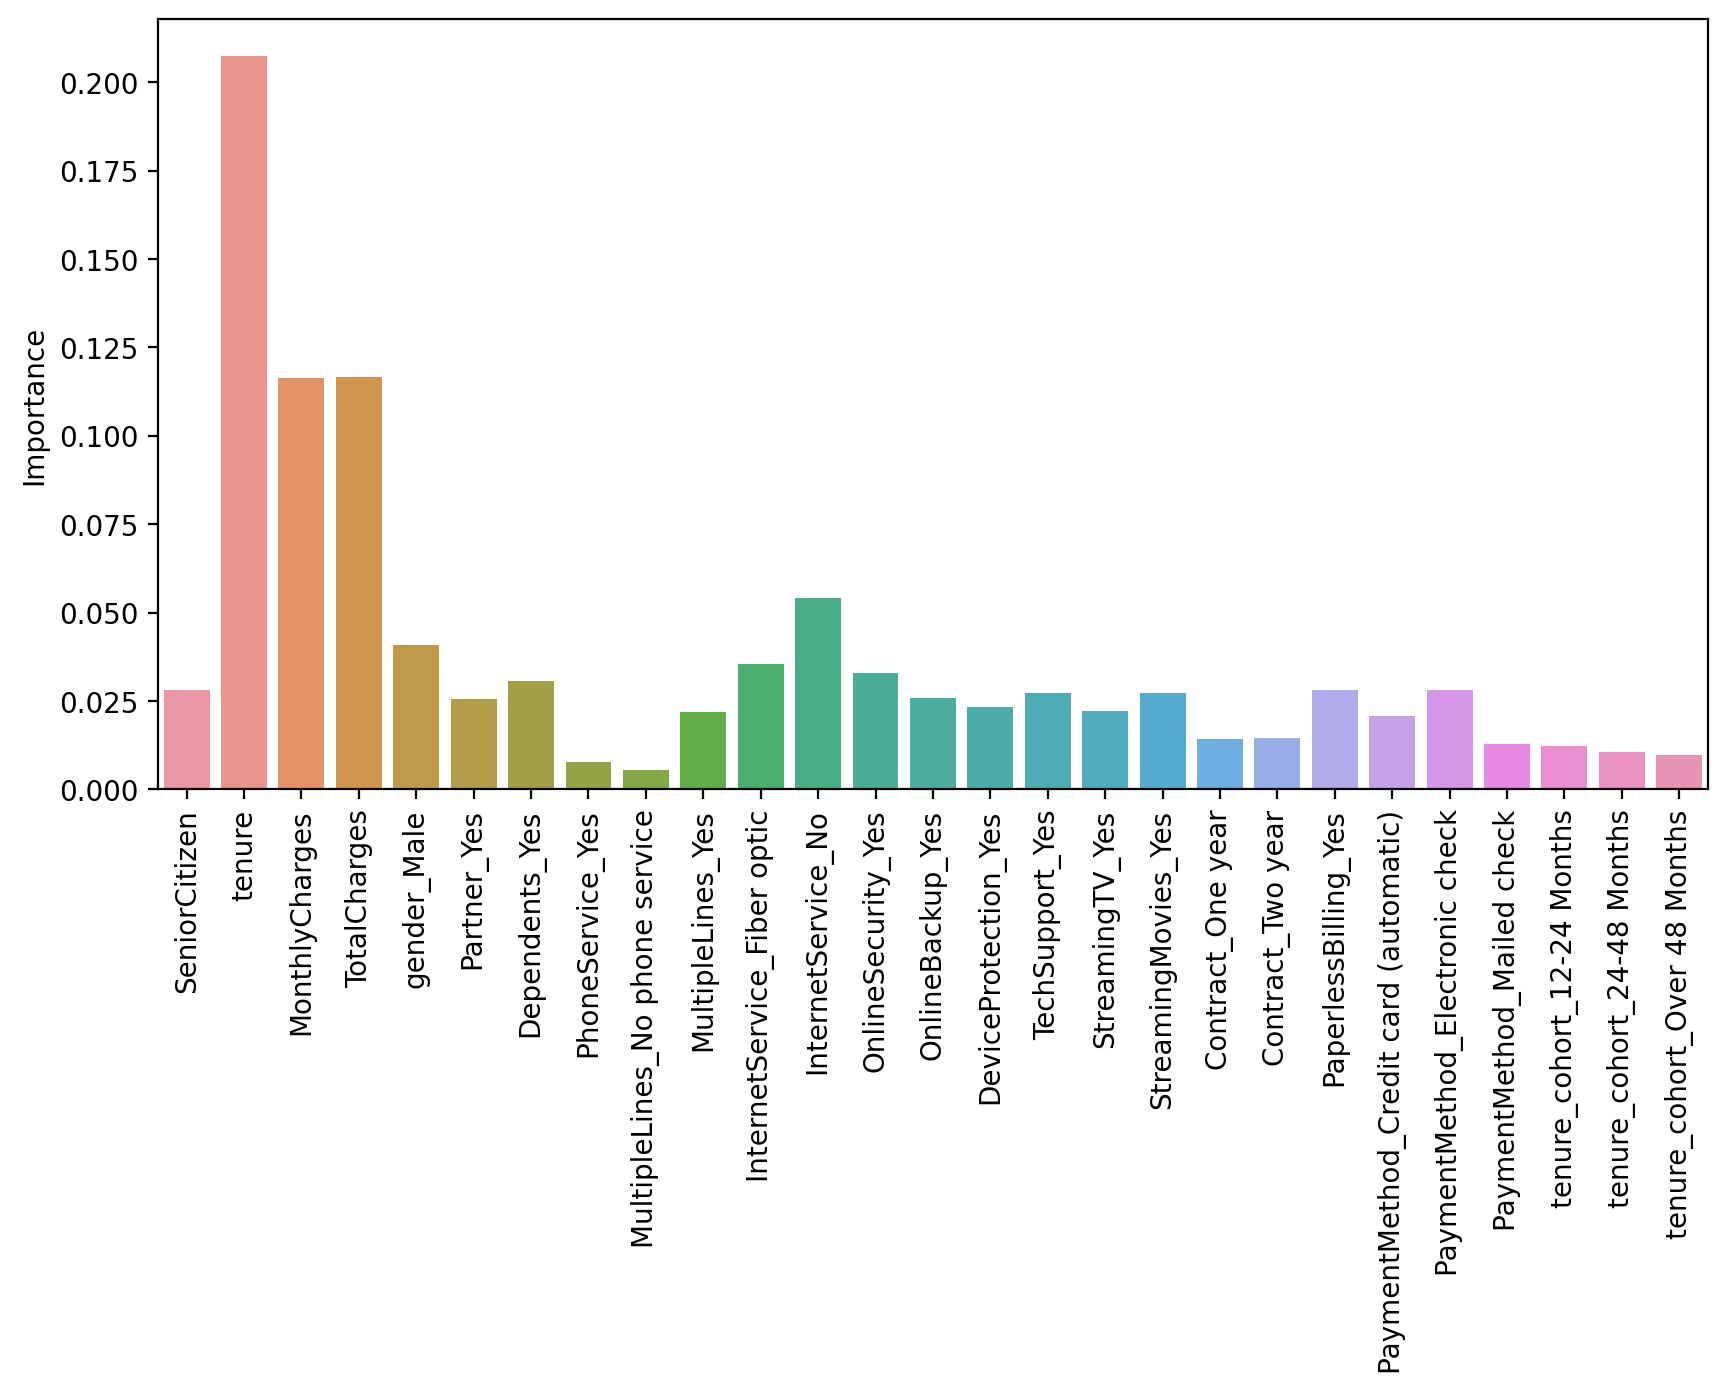

In [175]:
feat = pd.DataFrame(index=X.columns, data=dtc.feature_importances_, columns=['Importance'])
imp_feats = feat[feat['Importance'] > 0]
plt.figure(figsize = (10, 5), dpi = 200)
sns.barplot(data = imp_feats, x=imp_feats.index, y='Importance')
plt.xticks(rotation = 90);

## Random Forest

<b>Step #21: create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set </b>

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [181]:
n_estimators = [10, 25, 50, 75, 100]
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2']
bootstrap = [True, False]
oob_score = [True, False]

param_grid = {'n_estimators': n_estimators,
             'criterion': criterion,
             'max_features': max_features,
             'bootstrap': bootstrap,
             'oob_score': oob_score}

In [182]:
model = RandomForestClassifier(verbose = True)

In [183]:
grid = GridSearchCV(model, param_grid)

In [184]:
grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 o

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to comput

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend Sequent

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend Sequent

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using 

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


GridSearchCV(estimator=RandomForestClassifier(verbose=True),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 25, 50, 75, 100],
                         'oob_score': [True, False]})

In [185]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'oob_score': True}

In [186]:
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'gini',
                             max_features = 'sqrt',
                             bootstrap = True,
                             oob_score = True)

In [187]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', oob_score=True)

In [188]:
predictions = rfc.predict(X_test)

In [189]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.51      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.79      0.80      0.79       704



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


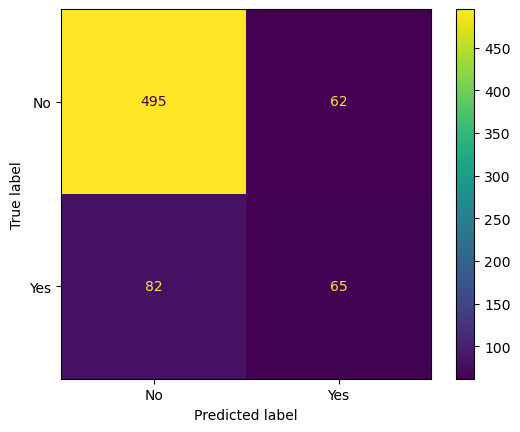

In [190]:
plot_confusion_matrix(rfc, X_test, y_test)

## Boosted Trees

<b>Step #22: use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results

In [197]:
from sklearn.ensemble import AdaBoostClassifier

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [199]:
model = AdaBoostClassifier(n_estimators = 10)

In [200]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10)

In [201]:
predictions = model.predict(X_test)

In [202]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.86      0.94      0.90       557
         Yes       0.66      0.41      0.51       147

    accuracy                           0.83       704
   macro avg       0.76      0.68      0.70       704
weighted avg       0.82      0.83      0.82       704



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


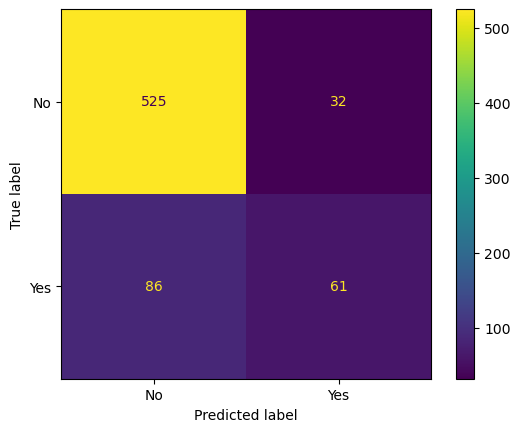

In [203]:
plot_confusion_matrix(model, X_test, y_test);

<b>Step #23: Analyze the results, which is the best model performance?</b>

<b><i>The AdaBoostClassifier model achieved the best performance for our machine learning project. It has an accuracy of 0.83, meaning it accurately predicts the outcome in 83% of cases. <br>
The macro average score of 0.70 indicates good performance across different classes, and the weighted average score of 0.82 suggests effectiveness in handling imbalanced data. <br>
Overall, the AdaBoostClassifier is the top-performing model for our project!</i></b>